In [30]:
import astropy.io.fits as fits
import numpy as np
from astropy.table import unique,Table,setdiff,hstack,join,QTable
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import warnings
from scipy.stats import sem
import seaborn as sns
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.coordinates import SkyCoord, angular_separation

# # read in data
# SAMI_G15_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_sami_1.0.fits')
# HSC_G15_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_HSC_galaxies.fits')
# HSC_G15_rands = Table.read('/suphys/fscu5535/HSC_work/mod_data/g15randisprimcorrect.fits')

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [2]:
# set misssing RE_CIRC values to mean of G15, then make 5RE_CIRC_MPC col
maskedID = SAMI_G15_gals['RE_CIRC_KPC'].mask.nonzero()[0]
print(maskedID)
check = []

for i in maskedID:
    SAMI_G15_gals['RE_CIRC_KPC'][i] = np.mean(SAMI_G15_gals['RE_CIRC_KPC'])
    
print(SAMI_G15_gals['RE_CIRC_KPC'].mask.nonzero()[0])

for i in range(len(SAMI_G15_gals)):
    if SAMI_G15_gals['RE_CIRC_KPC'][i] == np.mean(SAMI_G15_gals["RE_CIRC_KPC"][i]):
        check.append(i)

SAMI_G15_gals['5_RE_CIRC_MPC'] = SAMI_G15_gals['RE_CIRC_KPC']*(5/1000)
SAMI_G15_gals.info()
SAMI_G15_gals.write('/suphys/fscu5535/HSC_work/mod_data/G15_sami_1.0.fits',overwrite=True)

[ 3 17 22]
[]
<Table length=745>
     name      dtype     unit      class     n_bad
------------- ------- --------- ------------ -----
        CATID   int64           MaskedColumn     0
           RA float32       deg       Column     0
          DEC float32       deg       Column     0
       Z_SPEC float32                 Column     0
  RE_CIRC_KPC float64           MaskedColumn     0
        ELLIP float64           MaskedColumn     3
   LAMBDAR_RE float64           MaskedColumn   340
       RA_RAD float32       rad       Column     0
      DEC_RAD float32       rad       Column     0
ANG_DIAM_DIST float64 Mpc / rad       Column     0
5_RE_CIRC_MPC float64           MaskedColumn     0


In [3]:
# now repeat for various z 
redshifts = [0.125]

for k in redshifts:
    
    print("starting z <",k)
    
    CATIDS = np.zeros(len(SAMI_G15_gals),dtype=int)
    RE_CIRC_KPC = np.zeros(len(SAMI_G15_gals))
    #object_ids = np.full((len(SAMI_G15_gals),60000),np.nan)
    distances = np.full((len(SAMI_G15_gals),51000),np.nan)
    #HSC_ra = np.full((len(SAMI_G15_gals),60000),np.nan)
    #HSC_dec = np.full((len(SAMI_G15_gals),60000),np.nan)
    #HSC_photoz = np.full((len(SAMI_G15_gals),60000),np.nan)
    HSC_count = 0

    for i in range(len(SAMI_G15_gals)):
        ang_diam_1rad = SAMI_G15_gals['ANG_DIAM_DIST'][i]
        CATIDS[i] = SAMI_G15_gals['CATID'][i]
        RE_CIRC_KPC[i] = SAMI_G15_gals['RE_CIRC_KPC'][i]
        col = 0

        for j in range(len(HSC_G15_gals)):
            
#            if HSC_G15_gals['photoz_median'][j] <= k:
            HSC_count += 1
            ang_sep = angular_separation(SAMI_G15_gals['RA_RAD'][i],SAMI_G15_gals['DEC_RAD'][i],
                                HSC_G15_gals['ra_rad'][j],HSC_G15_gals['dec_rad'][j])
            sep = ang_sep*ang_diam_1rad

            if SAMI_G15_gals['5_RE_CIRC_MPC'][i] < sep < 20:
                #object_ids[i][col] = HSC_G15_gals['object_id'][j]
                #HSC_ra[i][col] = HSC_G15_gals['ra'][j]
                #HSC_dec[i][col] = HSC_G15_gals['dec'][j]
                #HSC_photoz[i][col] = HSC_G15_gals['photoz_median'][j]
                distances[i][col] = sep
                col+=1

        print(i+1,"/",len(SAMI_G15_gals),"done")

    HSC_count = int(HSC_count/len(SAMI_G15_gals))
    chunk = QTable()
    chunk['CATID'] = CATIDS
    chunk['RE_CIRC_KPC'] = RE_CIRC_KPC
    #chunk['OBJECT_ID'] = object_ids
    chunk['DISTANCE'] = distances
    distances = 0
    #chunk['HSC_RA'] = HSC_ra
    #chunk['HSC_DEC'] = HSC_dec
    #chunk['HSC_PHOTOZ'] = HSC_photoz
    print("HSC_count:",HSC_count)

    chunk.write('/import/silo5/fscu5535/HSC_work/mod_data/G15_reals_zlt{}_20Mpc_5REmin.fits'.format(k),overwrite=True)


starting z < 0.125
1 / 745 done
2 / 745 done
3 / 745 done
4 / 745 done
5 / 745 done
6 / 745 done
7 / 745 done
8 / 745 done
9 / 745 done
10 / 745 done


KeyboardInterrupt: 

shuffle complete 1188125 randoms selected!


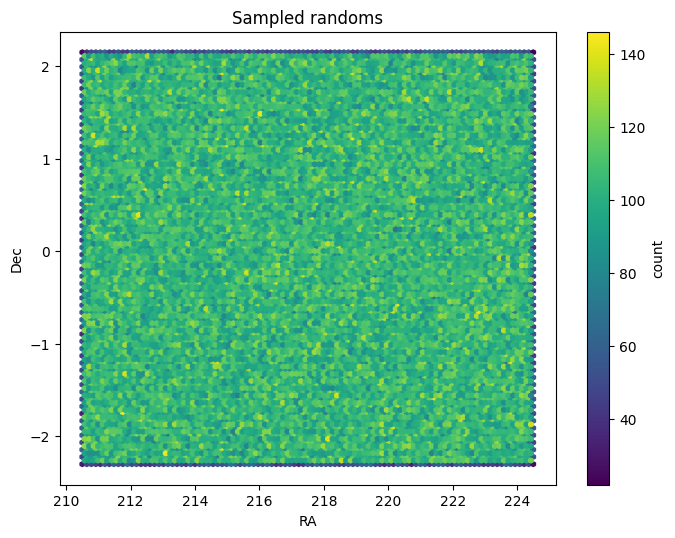

starting z < 0.125
1 / 745 done
2 / 745 done
3 / 745 done
4 / 745 done
5 / 745 done
6 / 745 done
7 / 745 done
8 / 745 done
9 / 745 done
10 / 745 done
11 / 745 done
12 / 745 done
13 / 745 done
14 / 745 done
15 / 745 done
16 / 745 done
17 / 745 done
18 / 745 done
19 / 745 done
20 / 745 done
21 / 745 done
22 / 745 done
23 / 745 done
24 / 745 done
25 / 745 done
26 / 745 done
27 / 745 done
28 / 745 done
29 / 745 done
30 / 745 done
31 / 745 done
32 / 745 done
33 / 745 done
34 / 745 done
35 / 745 done
36 / 745 done
37 / 745 done
38 / 745 done
39 / 745 done
40 / 745 done
41 / 745 done
42 / 745 done
43 / 745 done
44 / 745 done
45 / 745 done
46 / 745 done
47 / 745 done
48 / 745 done
49 / 745 done
50 / 745 done
51 / 745 done
52 / 745 done
53 / 745 done
54 / 745 done
55 / 745 done
56 / 745 done
57 / 745 done
58 / 745 done
59 / 745 done
60 / 745 done
61 / 745 done
62 / 745 done
63 / 745 done
64 / 745 done
65 / 745 done
66 / 745 done
67 / 745 done
68 / 745 done
69 / 745 done
70 / 745 done
71 / 745 d

554 / 745 done
555 / 745 done
556 / 745 done
557 / 745 done
558 / 745 done
559 / 745 done
560 / 745 done
561 / 745 done
562 / 745 done
563 / 745 done
564 / 745 done
565 / 745 done
566 / 745 done
567 / 745 done
568 / 745 done
569 / 745 done
570 / 745 done
571 / 745 done
572 / 745 done
573 / 745 done
574 / 745 done
575 / 745 done
576 / 745 done
577 / 745 done
578 / 745 done
579 / 745 done
580 / 745 done
581 / 745 done
582 / 745 done
583 / 745 done
584 / 745 done
585 / 745 done
586 / 745 done
587 / 745 done
588 / 745 done
589 / 745 done
590 / 745 done
591 / 745 done
592 / 745 done
593 / 745 done
594 / 745 done
595 / 745 done
596 / 745 done
597 / 745 done
598 / 745 done
599 / 745 done
600 / 745 done
601 / 745 done
602 / 745 done
603 / 745 done
604 / 745 done
605 / 745 done
606 / 745 done
607 / 745 done
608 / 745 done
609 / 745 done
610 / 745 done
611 / 745 done
612 / 745 done
613 / 745 done
614 / 745 done
615 / 745 done
616 / 745 done
617 / 745 done
618 / 745 done
619 / 745 done
620 / 745 

In [4]:
# now repeat for randoms, using right number of objects (based on redshift cut)
chunk = 0
# Counts: [0.275, 0.25] = [432462, 346876]

# now repeat for various z 
redshifts = [0.125]
HSC_count = 47525

# these were obtained from the reals calculation

for k in range(len(redshifts)):
    
    random_sample_size = HSC_count*25
    indices = np.random.randint(len(HSC_G15_rands), size = random_sample_size)
    print("shuffle complete", len(indices), "randoms selected!")
    
    plt.figure(figsize=(8,6),dpi=100)
    plt.hexbin(HSC_G15_rands[indices]['ra'],HSC_G15_rands[indices]['dec'])
    plt.xlabel("RA")
    plt.ylabel("Dec")
    plt.title("Sampled randoms")
    cb=plt.colorbar()
    cb.set_label('count')
    plt.show()
    
    print("starting z <",redshifts[k])

    CATIDS = np.zeros(len(SAMI_G15_gals),dtype=int)
    RA = np.zeros(len(SAMI_G15_gals))
    DEC = np.zeros(len(SAMI_G15_gals))
    Z = np.zeros(len(SAMI_G15_gals))
    distances = np.full((len(SAMI_G15_gals),51000*25),np.nan)

    for i in range(len(SAMI_G15_gals)):
        ang_diam_1rad = SAMI_G15_gals['ANG_DIAM_DIST'][i]
        CATIDS[i] = SAMI_G15_gals['CATID'][i]
        RA[i] = SAMI_G15_gals['RA'][i]
        DEC[i] = SAMI_G15_gals['DEC'][i]
        Z[i] = SAMI_G15_gals['Z_SPEC'][i]

        col = 0

        for j in range(random_sample_size):      
            ang_sep = angular_separation(SAMI_G15_gals['RA_RAD'][i],SAMI_G15_gals['DEC_RAD'][i],
                                HSC_G15_rands['ra_rad'][indices[j]],HSC_G15_rands['dec_rad'][indices[j]])
            sep = ang_sep*ang_diam_1rad

            if SAMI_G15_gals['5_RE_CIRC_MPC'][i] < sep < 20:
                distances[i][col] = sep
                col+=1

        print(i+1,"/",len(SAMI_G15_gals),"done")

    chunk = QTable()
    chunk['CATID'] = CATIDS
    chunk['RA'] = RA
    chunk['DEC'] = DEC
    chunk['Z'] = Z
    chunk['RAND_DISTANCE'] = distances
    distances = 0

    chunk.write('/import/silo5/fscu5535/HSC_work/mod_data/G15_rands_rev_{}_20Mpc_25xrand_5REmin.fits'.format(redshifts[k]),overwrite=True)
    print("written to file")

In [5]:
chunk = 0

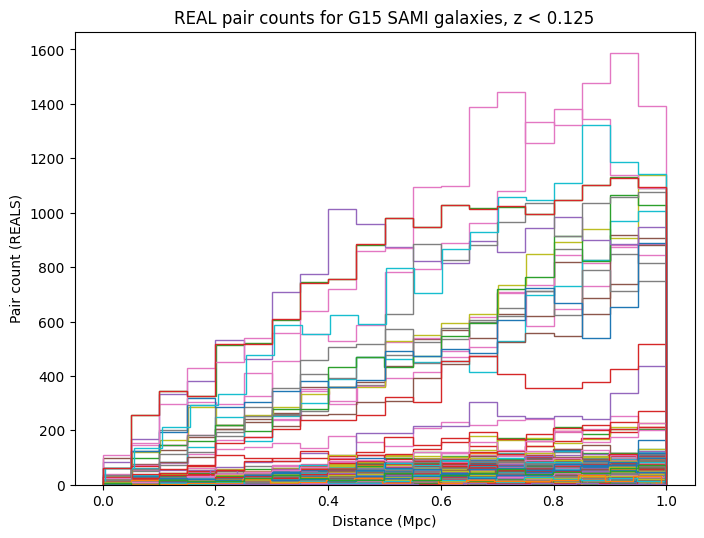

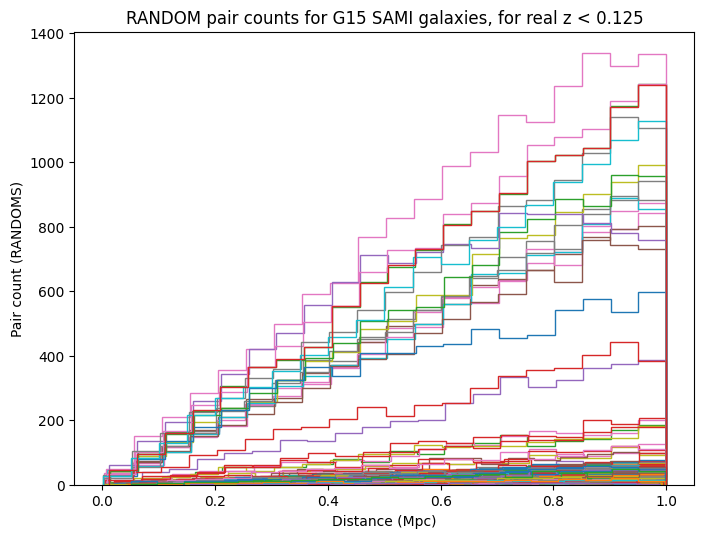

In [46]:
#redshiftsall = ['0.3','0.275','0.25','0.225','0.2','0.175','0.15','0.125','0.1']
redshifts = ['0.125']


def paircounthist(redshifts):
    for i in redshifts:

        reals = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G15_reals_zlt{}.fits'.format(i))
        rands = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G15_rands_rev_{}.fits'.format(i))

        plt.figure(figsize=(8,6),dpi=100)
        for j in range(len(reals)):
            plt.hist(reals['DISTANCE'][j],bins=20,histtype='step',fill=False)
        plt.xlabel("Distance (Mpc)")
        plt.ylabel("Pair count (REALS)")
        plt.title("REAL pair counts for G15 SAMI galaxies, z < {}".format(i))
        
#         filename = "/suphys/fscu5535/HSC_work/figures/G15realpaircount{}.png".format(i)
#         plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)    
#         plt.clf()


        plt.figure(figsize=(8,6),dpi=100)
        for j in range(len(rands)):
            plt.hist(rands['RAND_DISTANCE'][j],bins=20,histtype='step',fill=False)
        plt.xlabel("Distance (Mpc)")
        plt.ylabel("Pair count (RANDOMS)")
        plt.title("RANDOM pair counts for G15 SAMI galaxies, for real z < {}".format(i))
        
#         filename = "/suphys/fscu5535/HSC_work/figures/G15randpaircount{}.png".format(i)
#         plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)    
#         plt.clf()
        
    return
 
paircounthist(redshifts)

read in complete (z < 0.125)
50 complete
100 complete
200 complete
500 complete
1000 complete
saved (z < 0.125)


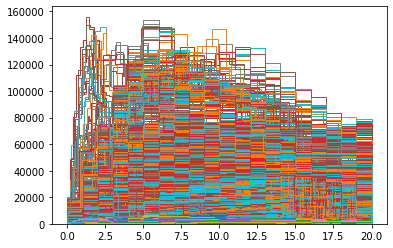

In [70]:
#redshiftsall = ['0.3','0.275','0.25','0.225','0.2','0.175','0.15','0.125','0.1']
redshifts = ['0.125']

binwidth = [50,100,200,500,1000]
searchradius = 20000
randfactor = 25 
    
for i in redshifts:

    reals = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G15_reals_zlt{}_20Mpc.fits'.format(i))
    rands = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G15_rands_rev_{}_20Mpc_25xrand.fits'.format(i))
    print("read in complete (z < {})".format(i))
    
    for k in binwidth:

        ratios = np.zeros(searchradius//k)

        # calculate the ratio
        for j in range(len(reals)):
            n_real,bin_real,patches = plt.hist(reals['DISTANCE'][j],bins=searchradius//k,
                                                                  histtype='step',fill=False)

            n_rand,bin_rand,patches = plt.hist(rands['RAND_DISTANCE'][j],bins=searchradius//k,
                                                                  histtype='step',fill=False)

            ratio = (n_real / n_rand)*randfactor
            ratios = np.vstack((ratios,ratio))

        # clean up, remove zeros row and infs
        ratios = np.delete(ratios,0,0)
        xis = ratios-1
#         countinf = 0
#         countminus1 = 0
#         for row in range(xis.shape[0]):
#             for col in range(xis.shape[1]):
#                 if np.isinf(xis[row,col]):
#                     countinf += 1
#                     xis[row,col] = np.nan
#                 if xis[row,col] == -1:
#                     xis[row,col] = np.nan
#                     countminus1 += 1

#         print(k,"countinf: ",countinf)
#         print(k,"countminus1: ",countminus1)              

        reals['xi{}raw'.format(k)] = xis
        
        print(k,"complete")

reals.write('/import/silo5/fscu5535/HSC_work/mod_data/G15_reals_zlt{}_20Mpc_25xrand.fits'.format(i),overwrite=True)
print("saved (z < {})".format(i))
    
        
#     # plot all xi's 
#     plt.figure(figsize=(8,6),dpi=100)
#     radii = [25,75,125,175,225,275,325,375,425,475,525,575,625,675,725,775,825,875,925,975]
#     for k in range(len(reals)):
#         plt.plot(radii,xis[k])

#     plt.xlabel('Distance (kpc)')
#     plt.ylabel(r'$\xi(r)$')
#     plt.title("Correlation functions for G09 SAMI (HSC z < {})".format(i))
#     plt.show()
        
#     return

# xiplots(redshiftsall)

# def meanxi(redshifts):        
#         # plot mean xi
#         meanratios = np.nanmean(xis,axis=0)
#         plt.figure(figsize=(8,6),dpi=100)
#         #yerr=np.nanstd(xis,axis=0),capsize=3,
#         plt.errorbar(radii,meanratios,label='z < {}'.format(i))
#         plt.xlabel('Distance (kpc)')
#         plt.ylabel(r'$\xi(r)$')
#         plt.title("Mean correlation function for G09 SAMI (HSC z < {})".format(i))
#         plt.legend()
#         plt.show()
#         return

# xiplots(redshifts)

read in complete (z < 0.125)


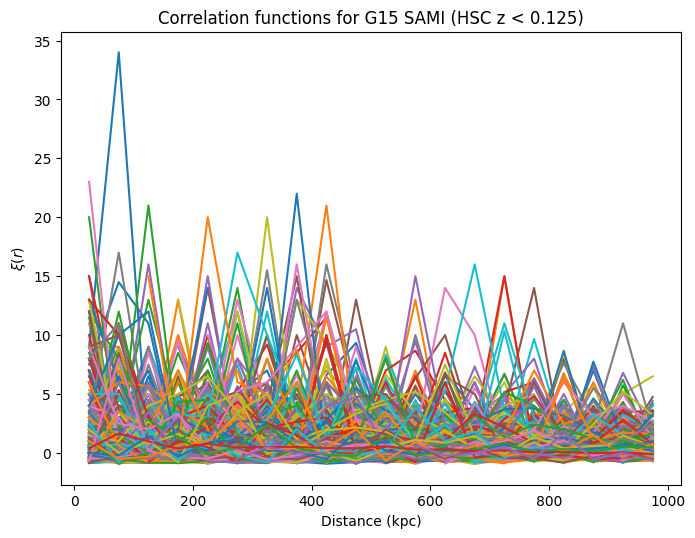

In [8]:
#redshiftsall = ['0.3','0.275','0.25','0.225','0.2','0.175','0.15','0.125','0.1']
redshifts = ['0.125']

radii = []
start = 25
step = 50
end = 975
x = start
while x <= end:
    radii.append(x)
    x += 50
    
    
for i in redshifts:

    reals = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G15_reals_zlt{}.fits'.format(i))
    print("read in complete (z < {})".format(i))
    
    
    # plot all xi's 
    plt.figure(figsize=(8,6),dpi=100)
    
    for k in range(len(reals)):
        plt.plot(radii,reals['xi50'][k])

    plt.xlabel('Distance (kpc)')
    plt.ylabel(r'$\xi(r)$')
    plt.title("Correlation functions for G15 SAMI (HSC z < {})".format(i))
    
#     filename = "/suphys/fscu5535/HSC_work/figures/G15_corrfuncs{}.png".format(i)
#     plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)    
#     plt.clf()


read in complete (z < 0.125)
z < 0.125 [1.55780234 0.94520748 0.73355653 0.85729889 0.89132815 0.74832846
 0.6661224  0.81488936 0.69178524 0.84334966 0.65251227 0.69627446
 0.64917395 0.6611336  0.67324907 0.69354949 0.62027084 0.64585273
 0.60420708 0.56776654]
0.125 Non-nan counts for each bin: [745, 555, 633, 689, 707, 719, 729, 734, 735, 740, 740, 741, 740, 742, 743, 738, 744, 742, 745, 745]


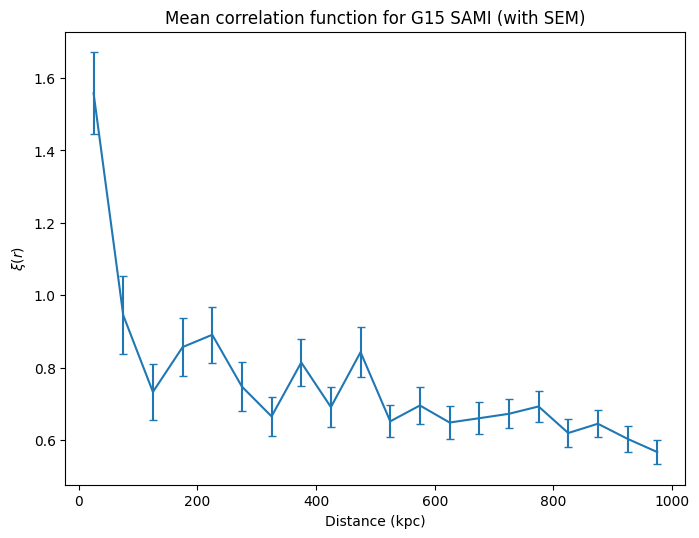

In [48]:
#redshiftsall = ['0.1','0.125','0.15','0.175','0.2','0.225','0.25','0.275','0.3']
redshifts = ['0.125']

plt.figure(figsize=(8,6),dpi=100)    
for i in redshifts:

    reals = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G15_reals_zlt{}.fits'.format(i))
    print("read in complete (z < {})".format(i))
    
    # plot mean xi with errors

    points = np.array(reals['xi50'])
    meanratios = np.nanmean(points,axis=0)
    print("z < {}".format(i),meanratios)
    counts = []

    for j in range(20):
        counts.append(np.count_nonzero(~np.isnan(points[:,j])))
    print(i,"Non-nan counts for each bin:",counts)
    
    plt.errorbar(radii,meanratios,yerr=np.nanstd(points,axis=0)/np.sqrt(counts),capsize=3)
    
plt.xlabel('Distance (kpc)')
plt.ylabel(r'$\xi(r)$')
plt.title(r"Mean correlation function for G15 SAMI (with SEM)".format(i))
filename = "/suphys/fscu5535/HSC_work/figures/G15meancorrfuncs0.125.png".format(i)
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)   

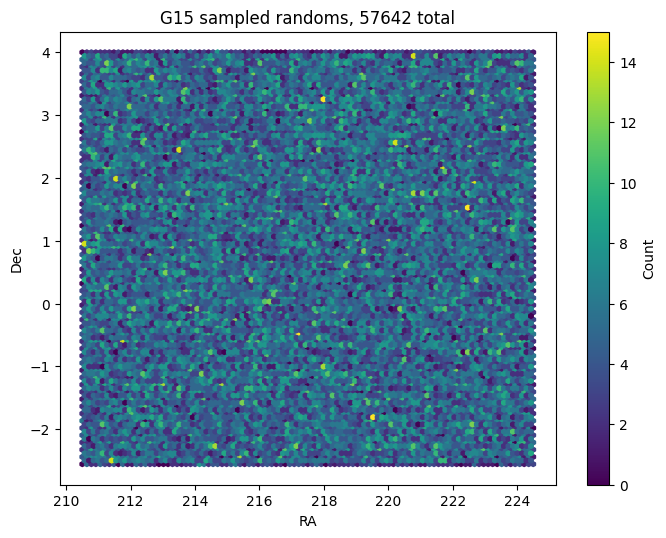

In [49]:
plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(HSC_G15_rands[indices]['ra'],HSC_G15_rands[indices]['dec'])
plt.title("G15 sampled randoms, {} total".format(len(indices)))
plt.xlabel("RA")
plt.ylabel("Dec")
cb=plt.colorbar()
cb.set_label('Count')
filename = "/suphys/fscu5535/HSC_work/figures/G15sampledrandoms0.125.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)  


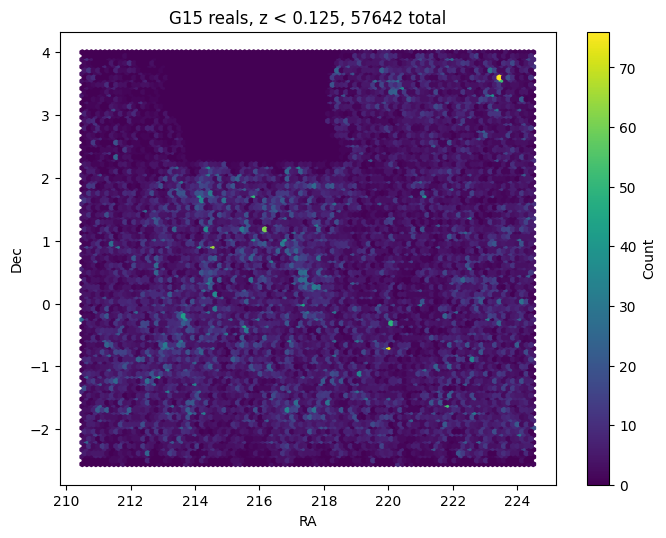

In [24]:
goodra = []
gooddec = []

for i in range(len(HSC_G15_gals)):
    if HSC_G15_gals['photoz_median'][i] <= 0.125:
        goodra.append(HSC_G15_gals['ra'][i])
        gooddec.append(HSC_G15_gals['dec'][i])
        

plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(goodra,gooddec)
plt.title("G15 reals, z < 0.125, {} total".format(len(goodra)))
plt.xlabel("RA")
plt.ylabel("Dec")
cb=plt.colorbar()
cb.set_label('Count')
filename = "/suphys/fscu5535/HSC_work/figures/G15realsdist.125.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)  

In [50]:
print("real dec min:",np.min(gooddec))
print("real dec max:",np.max(gooddec))

print("real ra min:",np.min(goodra))
print("real ra max:",np.max(goodra))


print("RAND (sampled) dec min:",np.min(HSC_G15_rands[indices]['dec']))
print("RAND (sampled) dec max:",np.max(HSC_G15_rands[indices]['dec']))
print("RAND (sampled) ra min:",np.min(HSC_G15_rands[indices]['ra']))
print("RAND (sampled) ra max:",np.max(HSC_G15_rands[indices]['ra']))

print("RAND (all) dec min:",np.min(HSC_G15_rands['dec']))
print("RAND (all) dec max:",np.max(HSC_G15_rands['dec']))
print("RAND (all) ra min:",np.min(HSC_G15_rands['ra']))
print("RAND (all) ra max:",np.max(HSC_G15_rands['ra']))

real dec min: -2.5567131569527275
real dec max: 3.999487300821027
real ra min: 210.50034502914903
real ra max: 224.49994785491756
RAND (sampled) dec min: -2.5566383446179453
RAND (sampled) dec max: 3.9998150744000194
RAND (sampled) ra min: 210.50055828236626
RAND (sampled) ra max: 224.4999844797062
RAND (all) dec min: -2.5567131097965303
RAND (all) dec max: 3.9999997868903447
RAND (all) ra min: 210.50000018292454
RAND (all) ra max: 224.49999960872643


In [38]:
print(np.max(HSC_G15_rands[indices]['dec']))

3.999985438952851


In [43]:
# fix new data
HSC_G15_rands['ra_rad'] = HSC_G15_rands['ra']*(np.pi/180)
HSC_G15_rands['dec_rad'] = HSC_G15_rands['dec']*(np.pi/180)

HSC_G15_rands.write('/suphys/fscu5535/HSC_work/mod_data/g15randisprimcorrect.fits',overwrite=True)

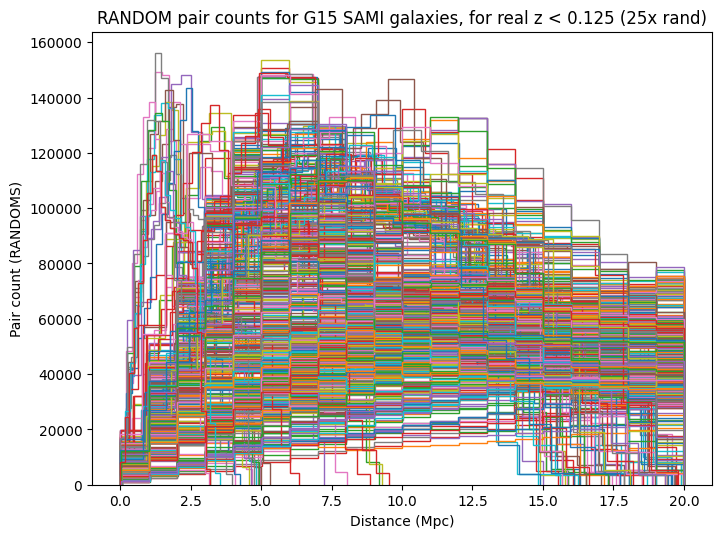

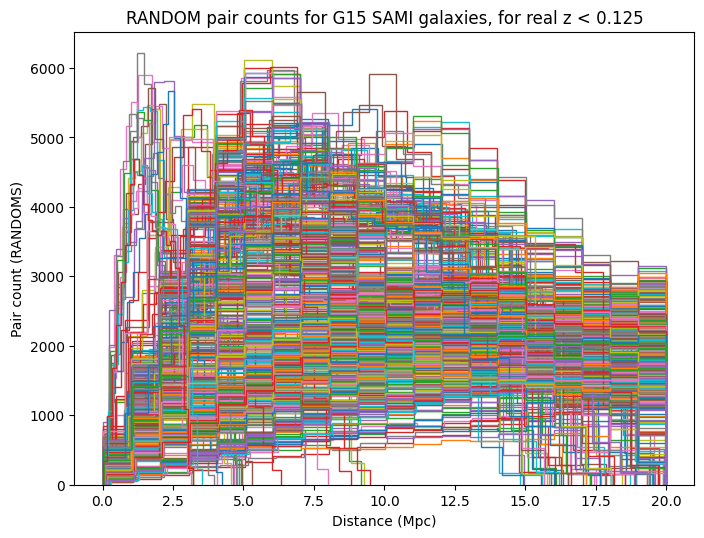

In [67]:
rands = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G15_rands_rev_0.125_20Mpc.fits')

plt.figure(figsize=(8,6),dpi=100)
for j in range(len(chunk)):
    plt.hist(chunk['RAND_DISTANCE'][j],bins=20,histtype='step',fill=False)
plt.xlabel("Distance (Mpc)")
plt.ylabel("Pair count (RANDOMS)")
plt.title("RANDOM pair counts for G15 SAMI galaxies, for real z < 0.125 (25x rand)".format(i))

filename = "/suphys/fscu5535/HSC_work/figures/G15rands20Mpc25x.125.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

plt.figure(figsize=(8,6),dpi=100)
for j in range(len(rands)):
    plt.hist(rands['RAND_DISTANCE'][j],bins=20,histtype='step',fill=False)
plt.xlabel("Distance (Mpc)")
plt.ylabel("Pair count (RANDOMS)")
plt.title("RANDOM pair counts for G15 SAMI galaxies, for real z < 0.125")

filename = "/suphys/fscu5535/HSC_work/figures/G15rands20Mpc.125.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

In [3]:
print("RAND (sampled) dec min:",np.min(HSC_G15_rands[indices]['dec']))
print("RAND (sampled) dec max:",np.max(HSC_G15_rands[indices]['dec']))
print("RAND (sampled) ra min:",np.min(HSC_G15_rands[indices]['ra']))
print("RAND (sampled) ra max:",np.max(HSC_G15_rands[indices]['ra']))

RAND (sampled) dec min: -2.556711992830017
RAND (sampled) dec max: 3.999979530816767
RAND (sampled) ra min: 210.50000268410304
RAND (sampled) ra max: 224.49995381435687


In [3]:
allg15 = Table.read('/suphys/fscu5535/HSC_work/raw_data/G15+1degzlt0.3.fits')
allg15.info()

<Table length=990271>
            name             dtype     class     n_bad 
--------------------------- ------- ------------ ------
                  object_id   int64 MaskedColumn      0
           object_id_isnull    bool       Column      0
                         ra float64       Column      0
                  ra_isnull    bool       Column      0
                        dec float64       Column      0
                 dec_isnull    bool       Column      0
              photoz_median float32       Column      0
       photoz_median_isnull    bool       Column      0
              i_psfflux_mag float32 MaskedColumn   6810
       i_psfflux_mag_isnull    bool       Column      0
              r_psfflux_mag float32 MaskedColumn  23760
       r_psfflux_mag_isnull    bool       Column      0
             r_kronflux_mag float32 MaskedColumn  29899
      r_kronflux_mag_isnull    bool       Column      0
             i_kronflux_mag float32 MaskedColumn  25317
      i_kronflux_mag_isnul

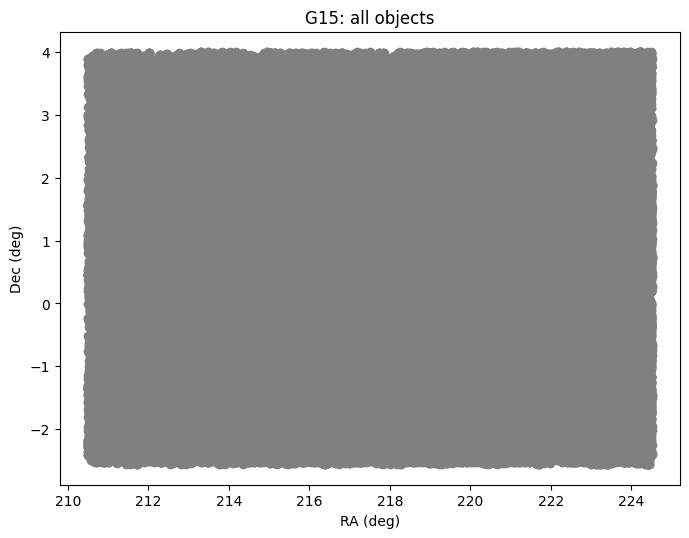

In [14]:
allg15ragal = np.full(162134,np.nan)
allg15dec = np.full(162134,np.nan)
index = 0

for i in range(len(allg15)):
    
    if allg15['photoz_median'][i] < 0.125:
        allg15ra[index] = allg15['ra'][i]
        allg15dec[index] = allg15['dec'][i]
        index += 1      
        
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(allg15ra,allg15dec,c='grey')
plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)")
plt.title("G15: all objects")

filename = "/suphys/fscu5535/HSC_work/figures/G15allobjects0.125.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 
        
        
        
        
        
        
        
        
        
        
        

In [8]:
print(np.max(allg15['photoz_median']))

0.29999962


In [2]:
allg15gal = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_HSC_galaxies_OLD.fits')
allg15star = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_HSC_stars.fits')
allg15unk = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_HSC_unknowns.fits')

# allg12gal = Table.read('/suphys/fscu5535/HSC_work/mod_data/G12_HSC_galaxies.fits')
# allg12star = Table.read('/suphys/fscu5535/HSC_work/mod_data/G12_HSC_stars.fits')
# allg12unk = Table.read('/suphys/fscu5535/HSC_work/mod_data/G12_HSC_unknowns.fits')

# allg09gal = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_galaxies.fits')
# allg09star = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_stars.fits')
# allg09unk = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_unknowns.fits')

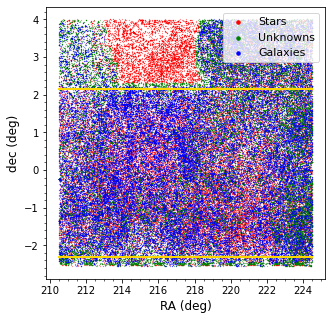

In [36]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,5))

# allg15ragal = np.full(500000,np.nan)
# allg15decgal = np.full(500000,np.nan)
# allg15rastar = np.full(500000,np.nan)
# allg15decstar = np.full(500000,np.nan)
# allg15raunk = np.full(500000,np.nan)
# allg15decunk = np.full(500000,np.nan)


# index = 0
# for i in range(len(allg15gal)):
    
#     if allg15gal['photoz_median'][i] < 0.125:
#         allg15ragal[index] = allg15gal['ra'][i]
#         allg15decgal[index] = allg15gal['dec'][i]
#         index += 1

# print("gals done")

# index = 0
# for i in range(len(allg15star)):
    
#     if allg15star['photoz_median'][i] < 0.125:
#         allg15rastar[index] = allg15star['ra'][i]
#         allg15decstar[index] = allg15star['dec'][i]
#         index += 1   

# print("stars done")
        
# index = 0       
# for i in range(len(allg15unk)):
    
#     if allg15unk['photoz_median'][i] < 0.125:
#         allg15raunk[index] = allg15unk['ra'][i]
#         allg15decunk[index] = allg15unk['dec'][i]
#         index += 1      
        
# print("unks done")

plt.scatter(allg15rastar,allg15decstar,c='red',label="Stars",s=0.03)
plt.scatter(allg15raunk,allg15decunk, c='green',label="Unknowns",s=0.03)
plt.scatter(allg15ragal,allg15decgal,c='blue', label="Galaxies",s=0.03)
plt.plot((np.nanmin(allg15ragal),np.nanmax(allg15ragal)),(-2.3,-2.3),c='gold',linewidth=2)
plt.plot((np.nanmin(allg15ragal),np.nanmax(allg15ragal)),(2.15,2.15),c='gold',linewidth=2)
plt.minorticks_on()
plt.xlabel("RA (deg)")
plt.ylabel("dec (deg)")
legend = plt.legend(loc='upper right',markerscale=20.)

#plt.title("G15: all objects")

filename = "/suphys/fscu5535/HSC_work/figures/G15allobjects0.125.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

gals done
stars done
unks done


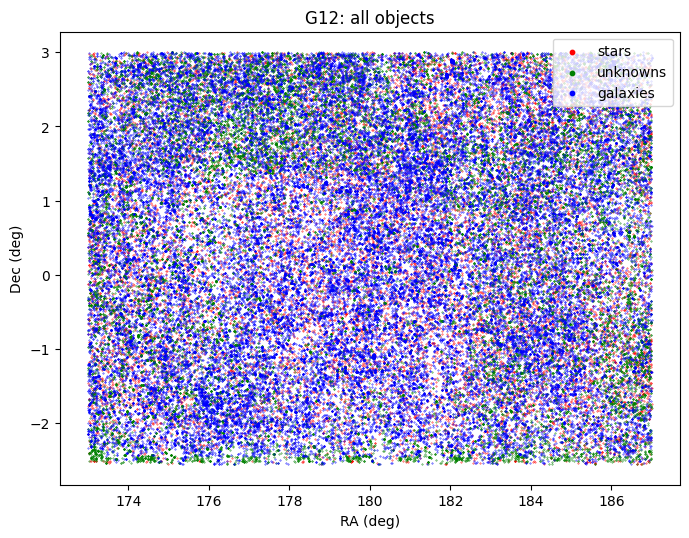

In [33]:
plt.figure(figsize=(8,6),dpi=100)

allg12ragal = np.full(500000,np.nan)
allg12decgal = np.full(500000,np.nan)
allg12rastar = np.full(500000,np.nan)
allg12decstar = np.full(500000,np.nan)
allg12raunk = np.full(500000,np.nan)
allg12decunk = np.full(500000,np.nan)


index = 0
for i in range(len(allg12gal)):
    
    if allg12gal['photoz_median'][i] < 0.125:
        allg12ragal[index] = allg12gal['ra'][i]
        allg12decgal[index] = allg12gal['dec'][i]
        index += 1

print("gals done")

index = 0
for i in range(len(allg12star)):
    
    if allg12star['photoz_median'][i] < 0.125:
        allg12rastar[index] = allg12star['ra'][i]
        allg12decstar[index] = allg12star['dec'][i]
        index += 1   

print("stars done")
        
index = 0       
for i in range(len(allg12unk)):
    
    if allg12unk['photoz_median'][i] < 0.125:
        allg12raunk[index] = allg12unk['ra'][i]
        allg12decunk[index] = allg12unk['dec'][i]
        index += 1      
        
print("unks done")

plt.scatter(allg12rastar,allg12decstar,c='red',label="stars",s=0.1)
plt.scatter(allg12raunk,allg12decunk, c='green',label="unknowns",s=0.1)
plt.scatter(allg12ragal,allg12decgal,c='blue', label="galaxies",s=0.1)
plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)")
legend = plt.legend(loc='upper right',markerscale=10.)

plt.title("G12: all objects")

filename = "/suphys/fscu5535/HSC_work/figures/g12allobjects0.125.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

gals done
stars done
unks done


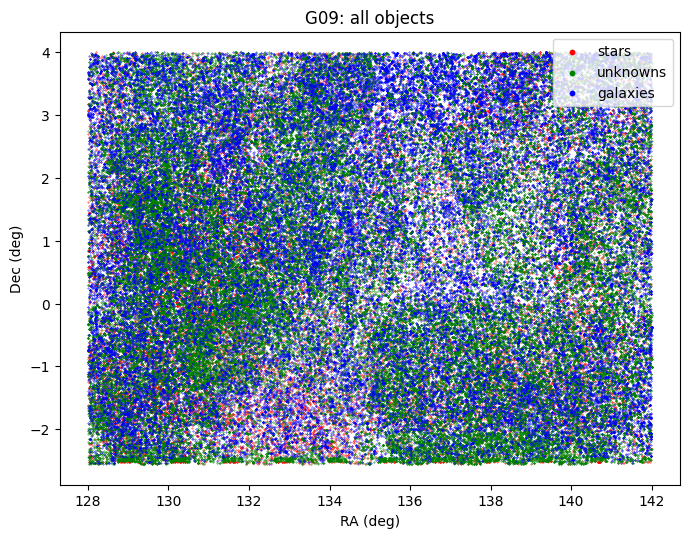

In [32]:
plt.figure(figsize=(8,6),dpi=100)

allg09ragal = np.full(500000,np.nan)
allg09decgal = np.full(500000,np.nan)
allg09rastar = np.full(500000,np.nan)
allg09decstar = np.full(500000,np.nan)
allg09raunk = np.full(500000,np.nan)
allg09decunk = np.full(500000,np.nan)


index = 0
for i in range(len(allg09gal)):
    
    if allg09gal['photoz_median'][i] < 0.125:
        allg09ragal[index] = allg09gal['ra'][i]
        allg09decgal[index] = allg09gal['dec'][i]
        index += 1

print("gals done")

index = 0
for i in range(len(allg09star)):
    
    if allg09star['photoz_median'][i] < 0.125:
        allg09rastar[index] = allg09star['ra'][i]
        allg09decstar[index] = allg09star['dec'][i]
        index += 1   

print("stars done")
        
index = 0       
for i in range(len(allg09unk)):
    
    if allg09unk['photoz_median'][i] < 0.125:
        allg09raunk[index] = allg09unk['ra'][i]
        allg09decunk[index] = allg09unk['dec'][i]
        index += 1      
        
print("unks done")

plt.scatter(allg09rastar,allg09decstar,c='red',label="stars",s=0.1)
plt.scatter(allg09raunk,allg09decunk, c='green',label="unknowns",s=0.1)
plt.scatter(allg09ragal,allg09decgal,c='blue', label="galaxies",s=0.1)
plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)")
legend = plt.legend(loc='upper right',markerscale=10.)

plt.title("G09: all objects")

filename = "/suphys/fscu5535/HSC_work/figures/g09allobjects0.125.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

shuffle complete 1188125 randoms selected!


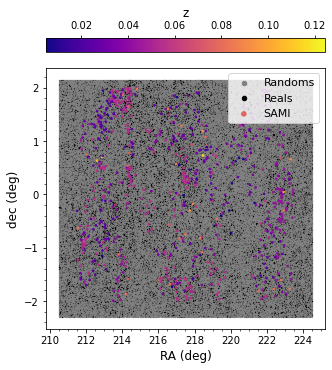

In [32]:
# now repeat for various z 
redshifts = [0.125]
HSC_count = 47525

# these were obtained from the reals calculation

for k in range(len(redshifts)):
    
    random_sample_size = HSC_count*25
    indices = np.random.randint(len(HSC_G15_rands), size = random_sample_size)
    print("shuffle complete", len(indices), "randoms selected!")
    
    fig, (ax1) = plt.subplots(1, 1, figsize=(5,6))
    plt.scatter(HSC_G15_rands[indices]['ra'],HSC_G15_rands[indices]['dec'],s=0.005,c='grey',label="Randoms")
    plt.scatter(HSC_G15_gals['ra'],HSC_G15_gals['dec'],s=0.005,c='black',label="Reals")
    plt.scatter(SAMI_G15_gals['RA'],SAMI_G15_gals['DEC'],s=2.5,c=SAMI_G15_gals['Z_SPEC'],label="SAMI",cmap='plasma')
    cb = plt.colorbar(location='top')
    cb.set_label('z')
    #fig.colorbar(location='top')
    plt.xlabel("RA (deg)")
    plt.ylabel("dec (deg)")
    plt.minorticks_on()
    #plt.title("G15")
    legend = plt.legend(loc="upper right",markerscale=1.0)
    for legobj in legend.legendHandles:
        legobj.set_sizes([20])
        
    filename = "/suphys/fscu5535/HSC_work/figures/G15realrandsamifixed.png"
    plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 